In [13]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pymer4.models import Lmer

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Loading the datasets

In [2]:
# non_merged pull request with the labels and complete characteristics for pr submitter
df_nonmerged = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/temp/Sample_10000_manual.csv")
# merged pull request that has no labels as nothing is rejected
df_merged = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Merged/pr_merged_final_April_2023.csv")
# all of the data that is merged and non merged
df_comp = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/pr_final_April_2023.csv")
# original dataset for getting the characterisitics of the pull request
df_TSE = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests.csv")

/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_83885/3636900561.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comp = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/pr_final_April_2023.csv")
/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_83885/3636900561.py:8: DtypeWarning: Columns (8,14,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_TSE = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests.csv")


In [3]:
df_TSE.head()

,Unnamed: 0,repo_id,pr_status,prs_id,pr_id,repo_pr_tenure_mnth,repo_pr_popularity,repo_pr_team_size,perc_external_contribs,pr_opened_at,prs_country,prs_continent,prm_country,prc_country,prs_pri_same_nationality,prs_experience,prs_succ_rate,pr_files_changed,pr_lines_changed,prs_main_team_member,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,pr_comments_counts,pr_num_commits,prs_eth,prc_eth,prm_eth,pr_nth,same_eth,pri_id,intra_branch,prm_id,prc_id,pri_id.1,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
0,1,2,not-merged,29988,33026,32,1,0,100,1329427085,united states,North America,\N,japan,0,7,29,0,0,0,9,0,0,47,8,1,White,White,Unknown,1,1,2,0,\N,2,2,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White
1,2,2,merged,282734,852598,30,1,2,100,1325669029,\N,\N,japan,japan,0,6,33,0,0,0,2,0,0,10,17,1,Unknown,White,White,2,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
2,3,2,merged,282734,1052366,30,1,3,100,1323724213,\N,\N,japan,japan,0,5,20,0,0,0,2,0,0,9,4,1,Unknown,White,White,1,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
3,4,3,merged,163945,12308,17,37,0,35,1344393044,united states,North America,\N,\N,0,0,0,0,0,0,21,0,1,28,4,4,White,White,White,1,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White
4,5,3,merged,163945,148263,18,38,6,38,1345400474,united states,North America,\N,\N,0,2,100,0,0,0,21,0,1,28,1,2,White,White,White,3,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White


#### Merging the characteristics of pr submitter with the complete dataset

In [4]:
df_merged[df_merged.duplicated(['pr_id'])].count()


Unnamed: 0             0
repo_id                0
status                 0
pr_id                  0
pullreq_id             0
api_url                0
 url                   0
pr_url                 0
pr_api_url             0
author_id              0
author_desc_body       0
closer_id              0
comments_counts        0
comments               0
commit_counts          0
code_changes_counts    0
created_at             0
closed_at              0
checked                0
author_country         0
closer_country         0
author_continent       0
same_country           0
author_eth             0
closer_eth             0
same_eth               0
prs_white              0
prs_api                0
prs_black              0
prs_hispanic           0
pri_white              0
pri_black              0
pri_api                0
pri_hispanic           0
prs_eth_8              0
prs_eth_7              0
prs_eth_9              0
prs_eth_diff           0
prs_eth_diff_2         0
dtype: int64

In [5]:
df_TSE = df_TSE.drop_duplicates(subset=['pr_id'], keep='first')
df_nonmerged = df_nonmerged.drop_duplicates(subset=['pr_id'], keep='first')


In [6]:
df_nonmerged = pd.merge(df_nonmerged, df_TSE[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth', 'prs_main_team_member']], on='pr_id', how='left', validate='one_to_one')
df_comp = pd.merge(df_comp, df_TSE[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth','prs_main_team_member']], on='pr_id', how='left', validate='one_to_one')
df_merged = pd.merge(df_merged, df_TSE[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth','prs_main_team_member']], on='pr_id', how='left', validate='one_to_one')

In [7]:
df_TSE.head()

,Unnamed: 0,repo_id,pr_status,prs_id,pr_id,repo_pr_tenure_mnth,repo_pr_popularity,repo_pr_team_size,perc_external_contribs,pr_opened_at,prs_country,prs_continent,prm_country,prc_country,prs_pri_same_nationality,prs_experience,prs_succ_rate,pr_files_changed,pr_lines_changed,prs_main_team_member,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,pr_comments_counts,pr_num_commits,prs_eth,prc_eth,prm_eth,pr_nth,same_eth,pri_id,intra_branch,prm_id,prc_id,pri_id.1,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
0,1,2,not-merged,29988,33026,32,1,0,100,1329427085,united states,North America,\N,japan,0,7,29,0,0,0,9,0,0,47,8,1,White,White,Unknown,1,1,2,0,\N,2,2,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White
1,2,2,merged,282734,852598,30,1,2,100,1325669029,\N,\N,japan,japan,0,6,33,0,0,0,2,0,0,10,17,1,Unknown,White,White,2,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
2,3,2,merged,282734,1052366,30,1,3,100,1323724213,\N,\N,japan,japan,0,5,20,0,0,0,2,0,0,9,4,1,Unknown,White,White,1,0,2,0,2,2,2,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown
3,4,3,merged,163945,12308,17,37,0,35,1344393044,united states,North America,\N,\N,0,0,0,0,0,0,21,0,1,28,4,4,White,White,White,1,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White
4,5,3,merged,163945,148263,18,38,6,38,1345400474,united states,North America,\N,\N,0,2,100,0,0,0,21,0,1,28,1,2,White,White,White,3,1,24,0,24,24,24,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White


In [8]:
# now we drop the values in each dataset that are not required
df_nonmerged.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)
df_merged.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)
df_comp.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

# Random Forest

## Building the model in rejected categories
for one rejected category against all the other categories. here for testing we are going to use 

### Encoding the dataset

In [296]:
# first we need to label the data according to one of them. lets first look at the data
# show the number of each label in manual_analysis
df_nonmerged['manual_analysis'].value_counts()

manual_analysis
Successful        2477
Unnecessary       1952
No reason         1288
Resolved          1027
Replaced           843
Quality            502
Duplicate          382
Stale              272
Merge Conflict     104
Chaotic             38
Not PR              20
Name: count, dtype: int64

In [297]:
#we are choosing Quality here, we are going to encode the quality to one and the rest to zero
#here are the categories 
# Successful        2477
# Unnecessary       1952
# No reason         1288
# Resolved          1027
# Replaced           843
# Quality            502
# Duplicate          382
# Stale              272
# Merge Conflict     104
# Chaotic             38
# Not PR              20
df_nonmerged_encoded = df_nonmerged.copy()

encoding = {'Quality': 0, 'Successful': 0, 'Unnecessary': 1, 'No reason': 0, 'Resolved': 0, 'Replaced': 0, 'Duplicate': 0, 'Stale': 0, 'Merge Conflict': 0, 'Chaotic': 0, 'Not PR': 0}
df_nonmerged_encoded['manual_analysis'] = df_nonmerged_encoded['manual_analysis'].map(encoding).astype(int)

#now we are going to encode everything else
df_nonmerged_encoded = df_nonmerged_encoded.replace(np.nan, 0) #first there are some missing values in four of the features prs_hispanic and the other races. we are going to replace them with zero
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_nonmerged_encoded['author_eth'] = le.fit_transform(df_nonmerged_encoded['author_eth'])
df_nonmerged_encoded['manual_analysis'] = le.fit_transform(df_nonmerged_encoded['manual_analysis'])
df_nonmerged_encoded['author_country'] = le.fit_transform(df_nonmerged_encoded['author_country'])
df_nonmerged_encoded['author_continent'] = le.fit_transform(df_nonmerged_encoded['author_continent'])
df_nonmerged_encoded['closer_eth'] = le.fit_transform(df_nonmerged_encoded['closer_eth'])
df_nonmerged_encoded['prs_eth_8'] = le.fit_transform(df_nonmerged_encoded['prs_eth_8'])
df_nonmerged_encoded['prs_eth_7'] = le.fit_transform(df_nonmerged_encoded['prs_eth_7'])
df_nonmerged_encoded['prs_eth_9'] = le.fit_transform(df_nonmerged_encoded['prs_eth_9'])
df_nonmerged_encoded['prs_eth_diff_2'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff_2'])
df_nonmerged_encoded['prs_eth_diff'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff'])
df_nonmerged_encoded['closer_country'] = le.fit_transform(df_nonmerged_encoded['closer_country'])
df_nonmerged_encoded['status'] = le.fit_transform(df_nonmerged_encoded['status'])

In [298]:
df_nonmerged_encoded.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,6,0,0,1.0,1,0,0,7,0,3,0,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,0,371,67,4,0,0,28,0
1,6,0,0,1.0,9,0,14,7,0,3,3,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,3,4,4,0,1578,32,7,0,0,44,0
2,183,0,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,0,64,59,51,1,0,6,0
3,183,0,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,0,276,40,245,1,1,35,0
4,340,0,1,1.0,3,73,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,0,11,0,1,1,1,8,0


In [299]:
#show the number of each label in manual_analysis
df_nonmerged_encoded['manual_analysis'].value_counts()

manual_analysis
0    6953
1    1952
Name: count, dtype: int64

### Random forest

In [300]:
X = df_nonmerged_encoded.drop(['manual_analysis'], axis=1)
y = df_nonmerged_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [302]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7804604154969118
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88      1391
           1       0.47      0.02      0.04       390

    accuracy                           0.78      1781
   macro avg       0.63      0.51      0.46      1781
weighted avg       0.71      0.78      0.69      1781



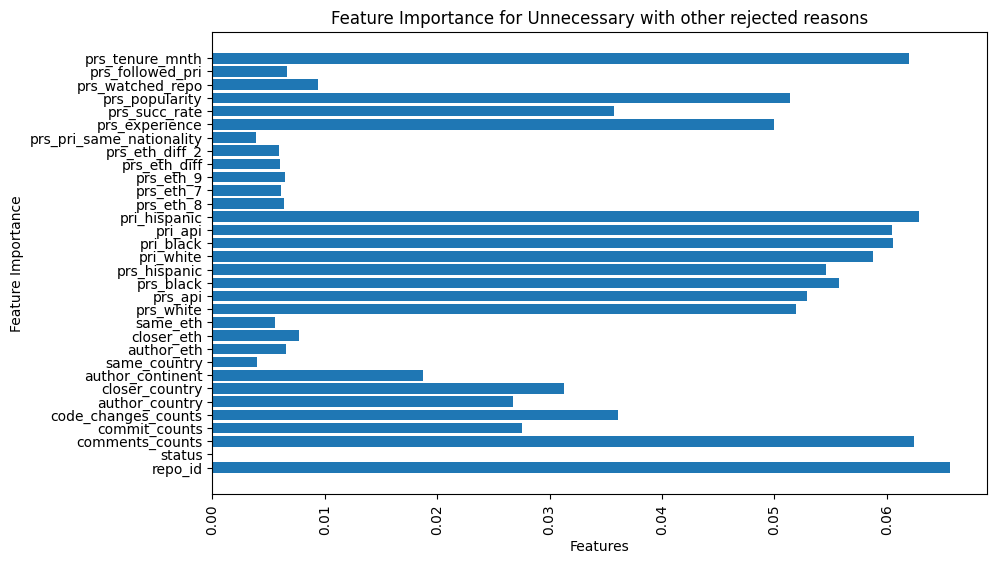

In [306]:
feature_importances = rf_classifier.feature_importances_
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title(f'Feature Importance for {category} with other rejected reasons')
plt.xticks(rotation=90)
plt.show()

## Building a model against merged PRs

### Sampling the Data from merged prs based on nonmerged prs rejection reasons

In [237]:
#first we need to deal with the sampling of the merged data based on the categories
#categories: 'Quality' 'Successful', 'Unnecessary', 'No reason', 'Resolved', 'Replaced', 'Duplicate', 'Stale', 'Merge Conflict', 'Chaotic', 'Not PR'
sampled_data = pd.DataFrame()

category = 'Unnecessary'

# Calculate the desired number of samples for the specified category
number_of_samples = len(df_nonmerged[df_nonmerged['manual_analysis'] == category])

# Filter repo_id values associated with the specified category in rejected_data
repo_ids_for_category = df_nonmerged[df_nonmerged['manual_analysis'] == category]['repo_id'].unique()

# Filter 'df_merged' to keep only rows with 'repo_id' values in repo_ids_for_category
filtered_df_merged = df_merged[df_merged['repo_id'].isin(repo_ids_for_category)]


# Iterate through the repositories with rejected PRs in the specified category
for repo_id in repo_ids_for_category:
    # Filter rows from filtered_df_merged for the current repo_id
    repo_samples = filtered_df_merged[filtered_df_merged['repo_id'] == repo_id]
    
    # If there are multiple samples for the current repo, select one randomly
    if len(repo_samples) > 1:
        repo_samples = repo_samples.sample(n=1, random_state=42)
    
    # Append the selected sample to the sampled_data DataFrame
    sampled_data = pd.concat([sampled_data, repo_samples])

# Randomly select additional samples to reach the desired number
remaining_samples = number_of_samples - len(sampled_data)
additional_samples = filtered_df_merged.sample(n=remaining_samples, random_state=42)
sampled_data = pd.concat([sampled_data, additional_samples])


In [238]:
sampled_data.count()

repo_id                     1952
status                      1952
comments_counts             1952
commit_counts               1952
code_changes_counts         1952
checked                     1952
author_country              1952
closer_country              1952
author_continent            1952
same_country                1952
author_eth                  1952
closer_eth                  1952
same_eth                    1952
prs_white                   1897
prs_api                     1897
prs_black                   1897
prs_hispanic                1897
pri_white                   1912
pri_black                   1912
pri_api                     1912
pri_hispanic                1912
prs_eth_8                   1952
prs_eth_7                   1952
prs_eth_9                   1952
prs_eth_diff                1952
prs_eth_diff_2              1952
prs_pri_same_nationality    1952
prs_experience              1952
prs_succ_rate               1952
prs_popularity              1952
prs_watche

In [239]:
sampled_repo_ids = set(sampled_data['repo_id'])

# Check if all sampled 'repo_id' values are in 'repo_ids_for_category'
if all(repo_id in repo_ids_for_category for repo_id in sampled_repo_ids):
    print("All samples are from repositories with the specified rejected reason.")
else:
    print("Some samples are not from repositories with the specified rejected reason.")

All samples are from repositories with the specified rejected reason.


In [240]:
#now concat all the data from the said category and the sampled data and order them by repo_id
df_sample_reason = pd.concat([df_nonmerged[df_nonmerged['manual_analysis'] == category], sampled_data], axis=0)
df_sample_reason = df_sample_reason.sort_values(by=['repo_id'])
#drop two columns, 'checked' and 'manual_analysis'
df_sample_reason.drop(['checked', 'manual_analysis'], axis=1, inplace=True)

In [241]:
#show the count of datas with the value not_merged in status and if they are unique or not
df_sample_reason['status'].value_counts()

status
merged        1952
not-merged    1952
Name: count, dtype: int64

In [242]:
df_sample_reason.head(20)

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
1062,6,merged,5.0,4.0,3.0,lovakia,china,Europe,0,White,Unknown,0,0.864294,0.012265,0.014323,0.107317,0.569895,0.032570,0.367695,0.028239,White,White,Unknown,White,White,0,3,67,21,1,0,11
5538,6,merged,1.0,1.0,1.0,\N,china,\N,0,API,Unknown,0,0.093853,0.894823,0.006393,0.004183,0.861588,0.040257,0.015183,0.082972,API,API,Unknown,API,API,0,188,20,3,0,0,27
115,6,merged,1.0,2.0,4.0,united states,china,North America,0,White,Unknown,0,0.991508,0.002199,0.000974,0.004593,0.569895,0.032570,0.367695,0.028239,White,White,White,White,White,0,9,56,33,1,1,2
4846,6,merged,0.0,1.0,3.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,1606,31,7,0,0,44
2829,6,not-merged,5.0,3.0,3.0,\N,china,\N,0,API,Unknown,0,0.105975,0.882329,0.004927,0.004077,0.569895,0.032570,0.367695,0.028239,API,API,Unknown,API,API,0,1,0,1,1,0,18
4923,6,merged,0.0,1.0,6.0,\N,\N,\N,\N,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.861588,0.040257,0.015183,0.082972,Unknown,White,Unknown,White,White,\N,1650,31,7,0,0,45
6675,6,merged,0.0,1.0,6.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.861588,0.040257,0.015183,0.082972,Unknown,White,Unknown,White,White,0,2089,34,8,0,1,62
7182,6,merged,0.0,1.0,1.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,2246,35,9,0,0,74
3593,6,merged,5.0,23.0,6.0,\N,china,\N,0,API,Unknown,0,0.093853,0.894823,0.006393,0.004183,0.569895,0.032570,0.367695,0.028239,API,API,Unknown,API,API,0,38,37,3,0,0,17
4889,6,merged,0.0,1.0,1.0,china,china,Asia,1,Unknown,Unknown,0,0.225369,0.107826,0.558558,0.108247,0.569895,0.032570,0.367695,0.028239,Unknown,Unknown,Unknown,Unknown,Unknown,1,232,50,35,1,0,22


### Encoding the data

In [309]:

df_sample_reason_encoded = df_sample_reason.copy()

#first there are some missing values in four of the features prs_hispanic and the other races. we are going to replace them with zero
df_sample_reason_encoded = df_sample_reason_encoded.replace(np.nan, 0) 
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_sample_reason_encoded['author_eth'] = le.fit_transform(df_sample_reason_encoded['author_eth'])
df_sample_reason_encoded['author_country'] = le.fit_transform(df_sample_reason_encoded['author_country'])
df_sample_reason_encoded['author_continent'] = le.fit_transform(df_sample_reason_encoded['author_continent'])
df_sample_reason_encoded['closer_eth'] = le.fit_transform(df_sample_reason_encoded['closer_eth'])
df_sample_reason_encoded['prs_eth_8'] = le.fit_transform(df_sample_reason_encoded['prs_eth_8'])
df_sample_reason_encoded['prs_eth_7'] = le.fit_transform(df_sample_reason_encoded['prs_eth_7'])
df_sample_reason_encoded['prs_eth_9'] = le.fit_transform(df_sample_reason_encoded['prs_eth_9'])
df_sample_reason_encoded['prs_eth_diff_2'] = le.fit_transform(df_sample_reason_encoded['prs_eth_diff_2'])
df_sample_reason_encoded['prs_eth_diff'] = le.fit_transform(df_sample_reason_encoded['prs_eth_diff'])
df_sample_reason_encoded['closer_country'] = le.fit_transform(df_sample_reason_encoded['closer_country'])
df_sample_reason_encoded['status'] = le.fit_transform(df_sample_reason_encoded['status'])

In [310]:
df_sample_reason_encoded.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
1062,6,0,5.0,4.0,3.0,44,10,3,0,4,2,0,0.864294,0.012265,0.014323,0.107317,0.569895,0.032570,0.367695,0.028239,4,4,2,4,3,0,3,67,21,1,0,11
5538,6,0,1.0,1.0,1.0,0,10,6,0,0,2,0,0.093853,0.894823,0.006393,0.004183,0.861588,0.040257,0.015183,0.082972,0,0,2,0,0,0,188,20,3,0,0,27
115,6,0,1.0,2.0,4.0,84,10,4,0,4,2,0,0.991508,0.002199,0.000974,0.004593,0.569895,0.032570,0.367695,0.028239,4,4,3,4,3,0,9,56,33,1,1,2
4846,6,0,0.0,1.0,3.0,0,10,6,0,3,2,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,2,4,3,0,1606,31,7,0,0,44
2829,6,1,5.0,3.0,3.0,0,10,6,0,0,2,0,0.105975,0.882329,0.004927,0.004077,0.569895,0.032570,0.367695,0.028239,0,0,2,0,0,0,1,0,1,1,0,18


In [311]:
encoded_to_unencoded_dict = dict(zip(df_sample_reason['status'], df_sample_reason_encoded['status']))
print(encoded_to_unencoded_dict)

{'merged': 0, 'not-merged': 1}


In [312]:
df_sample_reason_encoded['status'].value_counts()

status
0    1952
1    1952
Name: count, dtype: int64

### Random forest

In [313]:
#to remove the columns with '\\N' values, the two column that have them are same_country and prs_pri_same_nationality	

columns_with_n_values = []
for column in df_sample_reason_encoded.columns:
    if df_sample_reason_encoded[column].dtype == 'object' and '\\N' in df_sample_reason_encoded[column].values:
        columns_with_n_values.append(column)
mask = df_sample_reason_encoded[columns_with_n_values].apply(lambda col: col.str.contains(r'\\N')).any(axis=1)

# Use the mask to filter and display the rows where '\\N' occurs
rows_with_n_values = df_sample_reason_encoded[mask]

In [320]:
columns_with_n_values

['same_country', 'prs_pri_same_nationality']

In [317]:
for column in columns_with_n_values:
    df_sample_reason_encoded[column] = df_sample_reason_encoded[column].replace('\\N', 0)


In [318]:
X = df_sample_reason_encoded.drop(['status'], axis=1)
y = df_sample_reason_encoded['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:
rf_classifier_sample = RandomForestClassifier(random_state=42)
rf_classifier_sample.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [352]:
y_pred = rf_classifier_sample.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print(f"Classification Report for {category} against merged PRs:\n", report)

Accuracy: 0.7119078104993598
Classification Report for Unnecessary against merged PRs:
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       388
           1       0.68      0.79      0.73       393

    accuracy                           0.71       781
   macro avg       0.72      0.71      0.71       781
weighted avg       0.72      0.71      0.71       781



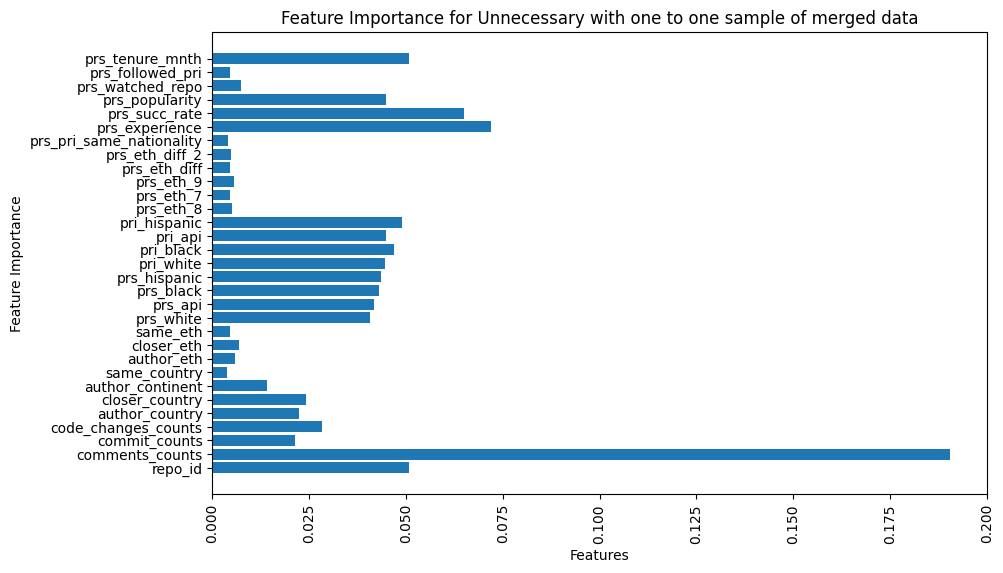

In [353]:
feature_importances_sample = rf_classifier_sample.feature_importances_
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances_sample)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title(f'Feature Importance for {category} with one to one sample of merged data')
plt.xticks(rotation=90)
  # Invert y-axis to display the most important features at the top
plt.show()

In [355]:
# sort the feature importances in descending order and print all of them
sorted_indices = np.argsort(feature_importances_sample)[::-1]
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances_sample[idx]}")
    

comments_counts: 0.19062804937733127
prs_experience: 0.07203530414630481
prs_succ_rate: 0.06504848254042012
repo_id: 0.05087178800205038
prs_tenure_mnth: 0.05077676581175352
pri_hispanic: 0.04893954919302587
pri_black: 0.04694503769583244
pri_api: 0.04495107576686312
prs_popularity: 0.0448448059990124
pri_white: 0.044483314887082785
prs_hispanic: 0.04345301715737557
prs_black: 0.043066043268577874
prs_api: 0.04184624976584256
prs_white: 0.040574586882597546
code_changes_counts: 0.028425367132876248
closer_country: 0.024243850981702772
author_country: 0.022293207119892564
commit_counts: 0.021228342958622984
author_continent: 0.014081530806124311
prs_watched_repo: 0.007294622122143826
closer_eth: 0.006997482948912895
author_eth: 0.005837004102462663
prs_eth_9: 0.005497409682140239
prs_eth_8: 0.005066934520879041
prs_eth_diff_2: 0.004738920520830877
same_eth: 0.00459165131064326
prs_eth_7: 0.004492604543239105
prs_eth_diff: 0.00446986783331618
prs_followed_pri: 0.004469552437858442
prs_pr

# Looking at important features in all nonmerged and merged PRs

In [329]:
df_comp.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
0,2,not-merged,1,1,1,united states,japan,North America,0,White,White,1,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White,0,7,29,9,0,0,47
1,2,merged,0,1,1,\N,japan,\N,0,Unknown,White,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown,0,6,33,2,0,0,10
2,2,merged,0,1,1,\N,japan,\N,0,Unknown,White,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown,0,5,20,2,0,0,9
3,3,merged,7,3,1,united states,\N,North America,0,White,White,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White,0,0,0,21,0,1,28
4,3,merged,3,1,1,united states,\N,North America,0,White,White,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White,0,2,100,21,0,1,28


In [327]:
df_comp_encoded = df_comp.copy()

#first there are some missing values in four of the features prs_hispanic and the other races. we are going to replace them with zero
df_comp_encoded = df_comp_encoded.replace(np.nan, 0) 
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_comp_encoded['author_eth'] = le.fit_transform(df_comp_encoded['author_eth'])
df_comp_encoded['author_country'] = le.fit_transform(df_comp_encoded['author_country'])
df_comp_encoded['author_continent'] = le.fit_transform(df_comp_encoded['author_continent'])
df_comp_encoded['closer_eth'] = le.fit_transform(df_comp_encoded['closer_eth'])
df_comp_encoded['prs_eth_8'] = le.fit_transform(df_comp_encoded['prs_eth_8'])
df_comp_encoded['prs_eth_7'] = le.fit_transform(df_comp_encoded['prs_eth_7'])
df_comp_encoded['prs_eth_9'] = le.fit_transform(df_comp_encoded['prs_eth_9'])
df_comp_encoded['prs_eth_diff_2'] = le.fit_transform(df_comp_encoded['prs_eth_diff_2'])
df_comp_encoded['prs_eth_diff'] = le.fit_transform(df_comp_encoded['prs_eth_diff'])
df_comp_encoded['closer_country'] = le.fit_transform(df_comp_encoded['closer_country'])
df_comp_encoded['status'] = le.fit_transform(df_comp_encoded['status'])

In [328]:
df_comp_encoded.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
0,2,1,1,1,1,200,73,5,0,5,4,1,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,5,4,4,4,4,0,7,29,9,0,0,47
1,2,0,0,1,1,1,73,7,0,4,4,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,4,4,3,3,3,0,6,33,2,0,0,10
2,2,0,0,1,1,1,73,7,0,4,4,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,4,4,3,3,3,0,5,20,2,0,0,9
3,3,0,7,3,1,200,1,5,0,5,4,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,5,4,4,4,4,0,0,0,21,0,1,28
4,3,0,3,1,1,200,1,5,0,5,4,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,5,4,4,4,4,0,2,100,21,0,1,28


In [336]:
#to remove the columns with '\\N' values, the two column that have them are same_country and prs_pri_same_nationality	

columns_with_n_values = []
for column in df_comp_encoded.columns:
    if df_comp_encoded[column].dtype == 'object' and '\\N' in df_comp_encoded[column].values:
        columns_with_n_values.append(column)
mask = df_comp_encoded[columns_with_n_values].apply(lambda col: col.str.contains(r'\\N')).any(axis=1)

# Use the mask to filter and display the rows where '\\N' occurs
rows_with_n_values = df_comp_encoded[mask]

In [337]:
columns_with_n_values

[]

In [334]:
for column in columns_with_n_values:
    df_comp_encoded[column] = df_comp_encoded[column].replace('\\N', 0)


In [338]:
X_comp = df_comp_encoded.drop(['status'], axis=1)
y_comp = df_comp_encoded['status']

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_comp, y_comp, test_size=0.2, random_state=42)

In [339]:
rf_classifier_comp = RandomForestClassifier(random_state=42)
rf_classifier_comp.fit(X_train_comp, y_train_comp)

RandomForestClassifier(random_state=42)

In [341]:
y_pred_comp = rf_classifier_comp.predict(X_test_comp)

accuracy_comp = accuracy_score(y_test_comp, y_pred_comp)
report_comp = classification_report(y_test_comp, y_pred_comp)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_comp}")
print(f"Classification Report for all the data:\n", report_comp)

Accuracy: 0.8665642106920128
Classification Report for all the data:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92    395458
           1       0.79      0.36      0.49     87351

    accuracy                           0.87    482809
   macro avg       0.83      0.67      0.71    482809
weighted avg       0.86      0.87      0.85    482809



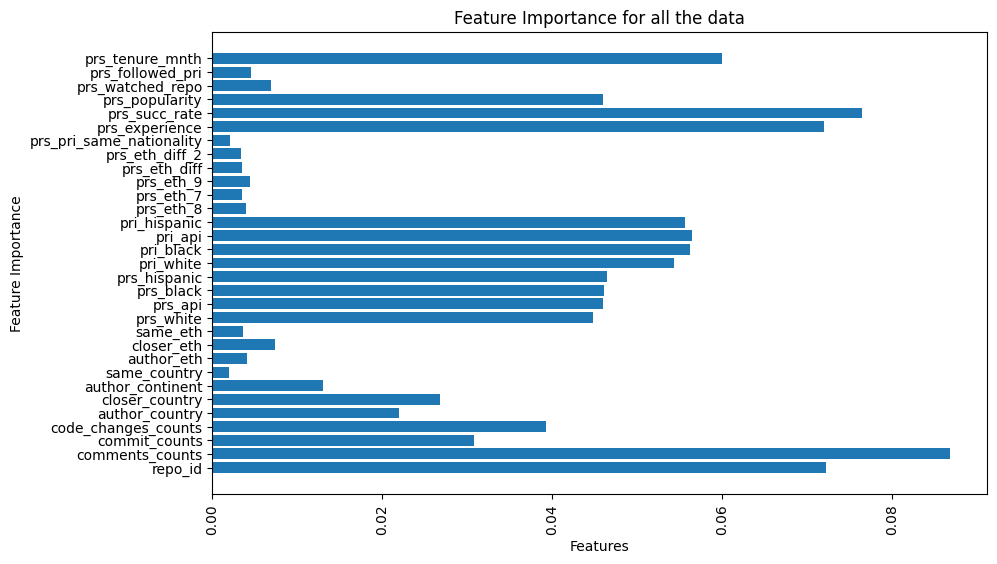

In [342]:
feature_importances_comp = rf_classifier_comp.feature_importances_
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_comp.columns, feature_importances_comp)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title(f'Feature Importance for all the data')
plt.xticks(rotation=90)
  # Invert y-axis to display the most important features at the top
plt.show()

In [347]:
# sort the feature importances in descending order and print all of them
sorted_indices = np.argsort(feature_importances_comp)[::-1]
for idx in sorted_indices:
    print(f"{X_comp.columns[idx]}: {feature_importances_comp[idx]}")
    

comments_counts: 0.08685964076160124
prs_succ_rate: 0.07647304865434677
repo_id: 0.07226554720166802
prs_experience: 0.07193223335521087
prs_tenure_mnth: 0.059966042760221494
pri_api: 0.056466364795400306
pri_black: 0.056183259928637354
pri_hispanic: 0.05560626827989323
pri_white: 0.05427766186116543
prs_hispanic: 0.04639188153043618
prs_black: 0.04609467087170293
prs_popularity: 0.04597106239618271
prs_api: 0.04592756777280558
prs_white: 0.04476968248353298
code_changes_counts: 0.039201724843896085
commit_counts: 0.03073568173250092
closer_country: 0.02674150040076958
author_country: 0.021905458002720795
author_continent: 0.013007023655788845
closer_eth: 0.007393312467137996
prs_watched_repo: 0.006892156441818609
prs_followed_pri: 0.004556323672654298
prs_eth_9: 0.004437386244329181
author_eth: 0.0040216972326883255
prs_eth_8: 0.004008395655653422
same_eth: 0.0035921848169710724
prs_eth_7: 0.00348770531365567
prs_eth_diff: 0.0034612186678345397
prs_eth_diff_2: 0.0033479631918324347
pr

# Multi Level Mixed Effect Logistic Regression

In [9]:
df_nonmerged['manual_analysis'].value_counts()

manual_analysis
Successful        2728
Unnecessary       2242
No reason         1416
Resolved          1142
Replaced           957
Quality            519
Duplicate          424
Stale              293
Merge Conflict     109
Chaotic             38
Not PR              20
Name: count, dtype: int64

In [22]:
#encoding the model:
df_nonmerged_encoded = df_nonmerged.copy()

encoding = {'Quality': 0, 'Successful': 0, 'Unnecessary': 0, 'No reason': 1, 'Resolved': 0, 'Replaced': 0, 'Duplicate': 0, 'Stale': 0, 'Merge Conflict': 0, 'Chaotic': 0, 'Not PR': 0}
df_nonmerged_encoded['manual_analysis'] = df_nonmerged_encoded['manual_analysis'].map(encoding).astype(int)

#now we are going to encode everything else
df_nonmerged_encoded = df_nonmerged_encoded.replace(np.nan, 0) #first there are some missing values in four of the features prs_hispanic and the other races. we are going to replace them with zero
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_nonmerged_encoded['author_eth'] = le.fit_transform(df_nonmerged_encoded['author_eth'])
df_nonmerged_encoded['manual_analysis'] = le.fit_transform(df_nonmerged_encoded['manual_analysis'])
df_nonmerged_encoded['author_country'] = le.fit_transform(df_nonmerged_encoded['author_country'])
df_nonmerged_encoded['author_continent'] = le.fit_transform(df_nonmerged_encoded['author_continent'])
df_nonmerged_encoded['closer_eth'] = le.fit_transform(df_nonmerged_encoded['closer_eth'])
df_nonmerged_encoded['prs_eth_8'] = le.fit_transform(df_nonmerged_encoded['prs_eth_8'])
df_nonmerged_encoded['prs_eth_7'] = le.fit_transform(df_nonmerged_encoded['prs_eth_7'])
df_nonmerged_encoded['prs_eth_9'] = le.fit_transform(df_nonmerged_encoded['prs_eth_9'])
df_nonmerged_encoded['prs_eth_diff_2'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff_2'])
df_nonmerged_encoded['prs_eth_diff'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff'])
df_nonmerged_encoded['closer_country'] = le.fit_transform(df_nonmerged_encoded['closer_country'])
df_nonmerged_encoded['status'] = le.fit_transform(df_nonmerged_encoded['status'])

/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [24]:
df_nonmerged_encoded.head() 

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,prs_main_team_member
0,6,0,0,1.0,1,0,0,7,0,3,0,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,1,0,371,67,4,0,0,28,0
1,6,0,0,1.0,9,0,14,7,0,3,3,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,3,4,4,1,0,1578,32,7,0,0,44,0
2,183,0,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,1,0,64,59,51,1,0,6,0
3,183,0,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,1,0,276,40,245,1,1,35,0
4,340,0,1,1.0,3,74,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,0,0,11,0,1,1,1,8,0


In [28]:
#to remove the columns with '\\N' values, the two column that have them are same_country and prs_pri_same_nationality	

columns_with_n_values = []
for column in df_nonmerged_encoded.columns:
    if df_nonmerged_encoded[column].dtype == 'object' and '\\N' in df_nonmerged_encoded[column].values:
        columns_with_n_values.append(column)
mask = df_nonmerged_encoded[columns_with_n_values].apply(lambda col: col.str.contains(r'\\N')).any(axis=1)

# Use the mask to filter and display the rows where '\\N' occurs
rows_with_n_values = df_nonmerged_encoded[mask]

In [29]:
columns_with_n_values

[]

In [32]:
melr_model = Lmer('manual_analysis ~ . + (1|manual_analysis)', data=df_nonmerged_encoded)
melr_model.fit()

/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "prs_pri_same_nationality". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'str'> and <class 'int'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


[1] "Model failed to converge with max|grad| = 0.904391 (tol = 0.002, component 1)"
[2] " \n"                                                                          

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

Linear mixed model fit by REML [’lmerMod’]
Formula: manual_analysis~.+(1|manual_analysis)

Family: gaussian	 Inference: parametric

Number of observations: 9888	 Groups: {'manual_analysis': 2.0}

Log-likelihood: 126056.482 	 AIC: -252046.964

Random effects:

                        Name  Var    Std
manual_analysis  (Intercept)  0.0  0.007
Residual                      0.0  0.000

No random effect correlations specified

Fixed effects:



/Users/amirrshams/opt/anaconda3/envs/pymer4/lib/python3.11/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.51,0.5,0.52,0.005,87.526,99.385,0.0,***
repo_id,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,
comments_counts,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,
commit_counts,0.00,-0.0,0.00,0.000,87.526,0.000,1.0,
code_changes_counts,0.00,-0.0,0.00,0.000,87.526,0.000,1.0,
author_country,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,
closer_country,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,
author_continent,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,
same_country,0.00,-0.0,0.00,0.000,87.526,0.000,1.0,
author_eth,-0.00,-0.0,0.00,0.000,87.526,-0.000,1.0,


In [17]:
print(melr_model.summary())


Linear mixed model fit by REML [’lmerMod’]
Formula: manual_analysis~.+(1|manual_analysis)

Family: gaussian	 Inference: parametric

Number of observations: 9888	 Groups: {'manual_analysis': 2.0}

Log-likelihood: 128195.198 	 AIC: -256324.397

Random effects:

                        Name  Var    Std
manual_analysis  (Intercept)  0.0  0.007
Residual                      0.0  0.000

No random effect correlations specified

Fixed effects:

                      Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  \
(Intercept)              0.462   0.452    0.471  0.005   0.005  95.988  0.963   
repo_id                  0.000  -0.000    0.000  0.000  61.826   0.000  1.000   
comments_counts          0.000  -0.000    0.000  0.000  61.826   0.000  1.000   
commit_counts            0.000  -0.000    0.000  0.000  61.826   0.000  1.000   
code_changes_counts      0.000  -0.000    0.000  0.000  61.826   0.000  1.000   
author_country           0.000  -0.000    0.000  0.000  61.826   0.000  1